In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import seaborn as sns
import geopandas as gpd
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
# 設定字體
#! gdown -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
sns.set(font=['Taipei Sans TC Beta'])

##### 基於北市老年人口的醫療福利機構分布

C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:45: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


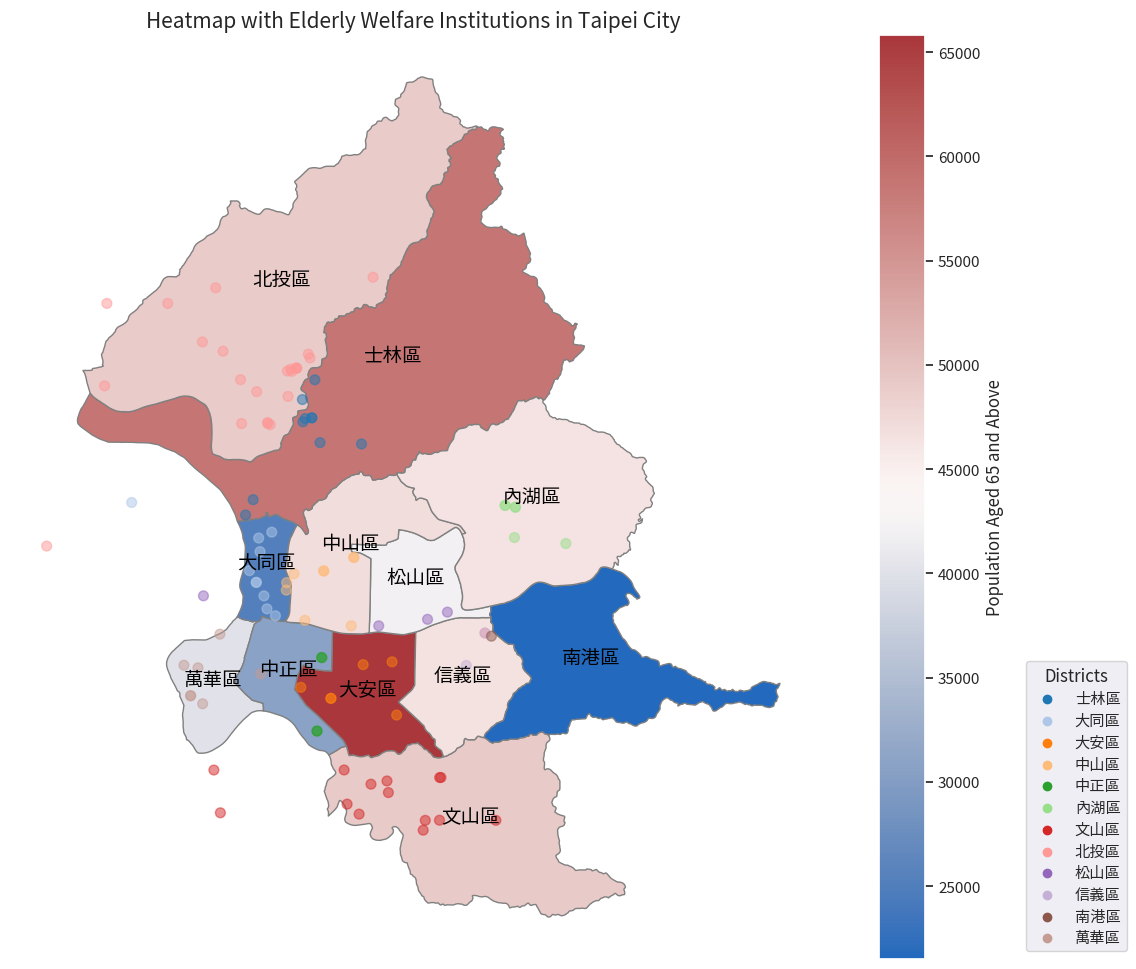

In [4]:
# Load and prepare the elderly population data
elderly_population_file = 'data/台北_行政區老年人口.csv'
taipei_data = pd.read_csv(elderly_population_file)
taipei_data_renamed = taipei_data.rename(columns={'區域別': 'TOWNNAME'})

# Load and prepare the shapefile for Taipei City
shapefile_path = 'shapefiles/TOWN_MOI_1120825.shp'
taipei_map = gpd.read_file(shapefile_path)
taipei_districts = taipei_map[taipei_map['COUNTYNAME'] == '臺北市']

# Merge the geographical data with the elderly population data
merged_data = taipei_districts.merge(taipei_data_renamed, on='TOWNNAME')

# Load and prepare the welfare institutions data
institutions_file_path = 'data/臺北市老人福利機構名冊.csv'
institutions_data = pd.read_csv(institutions_file_path)
gdf_institutions = gpd.GeoDataFrame(
    institutions_data, 
    geometry=gpd.points_from_xy(institutions_data['經度'], institutions_data['緯度'])
)

# Create a color palette for the districts
palette = sns.color_palette("tab20", len(institutions_data['區域別'].unique()))
district_colors = {district: color for district, color in zip(institutions_data['區域別'].unique(), palette)}

# Creating the heatmap with institution locations
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
base = merged_data.plot(column='65歲以上總和', ax=ax, legend=True, cmap='vlag', 
                        legend_kwds={'label': "Population Aged 65 and Above"},
                        edgecolor='grey')
gdf_institutions.plot(ax=base, marker='o', color=gdf_institutions['區域別'].map(district_colors), 
                      markersize=50, alpha=0.5)

# Adding titles and labels
ax.set_title('Heatmap with Elderly Welfare Institutions in Taipei City', fontdict={'fontsize': 15})
ax.set_axis_off()

# Adding a legend for institutions
for district, color in district_colors.items():
    ax.scatter([], [], c=[color], label=district)
ax.legend(title='Districts', loc='lower left', bbox_to_anchor=(1.25, 0))
# 在地圖上標記行政區名稱
for idx, row in merged_data.iterrows():
    plt.annotate(s=row['TOWNNAME'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=14, color='black')

plt.show()


##### 醫療福利機構分布比例

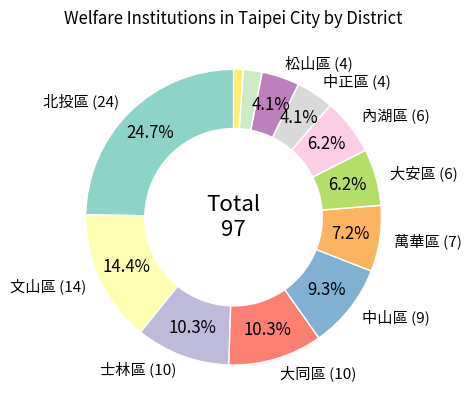

In [34]:
# Load the data from the CSV file containing information about welfare institutions
institutions_file_path = 'data/臺北市老人福利機構名冊.csv'
institutions_data = pd.read_csv(institutions_file_path)

# Extract the counts of institutions for each district
district_counts = institutions_data['區域別'].value_counts()

# Calculate the total count
total_count = district_counts.sum()

# Create labels with both district names and counts
labels = [f'{district} ({count})' if (count / total_count * 100) >= 4 else '' for district, count in zip(district_counts.index, district_counts)]

def custom_autopct(pct):
    """ Custom function to display percentage labels only for segments >= 4%. """
    return '%1.1f%%' % pct if pct >= 4 else ''

# Set a custom Seaborn color palette
sns.set_palette("Set3")

# Create a donut chart with Seaborn style
fig, ax = plt.subplots()
ax.pie(district_counts, labels=labels, autopct=custom_autopct, startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.8, textprops={'color': 'black'})

# Draw a circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Display the total count in the center
plt.text(0, 0, f'Total\n{total_count}', ha='center', va='center', fontsize=16, weight='bold', color='black')

# Add labels and title
plt.title('Welfare Institutions in Taipei City by District', color='black')

# Show the plot
plt.show()

##### 基於北市老年人口的醫療福利機構分布 + 衛生福利部評鑑合格醫院


C:\Users\flora\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:50: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


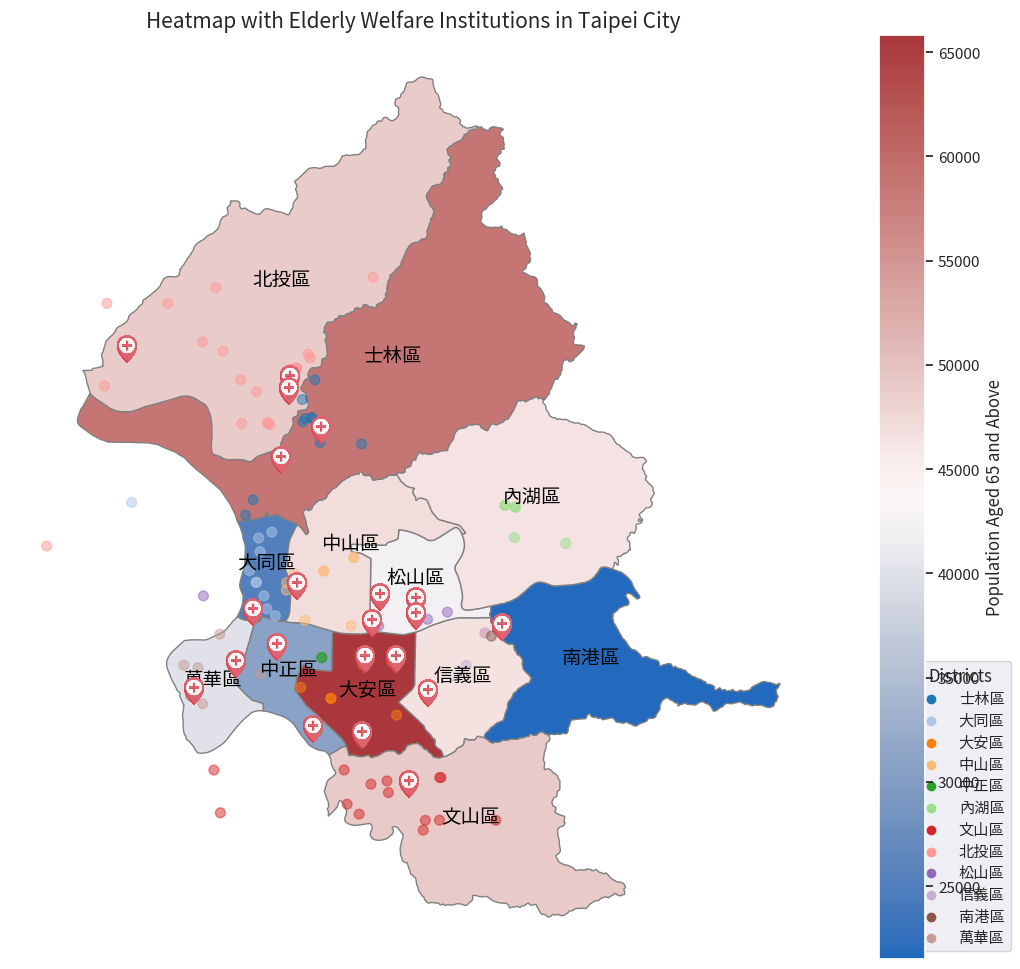

In [7]:
def plot_icon(ax, x, y, img, zoom=0.01):
    im_offset = OffsetImage(img, zoom=zoom)
    im_ab = AnnotationBbox(im_offset, (x, y), frameon=False, pad=0)
    ax.add_artist(im_ab)

# Load and prepare the elderly population data
elderly_population_file = 'data/台北_行政區老年人口.csv'
taipei_data = pd.read_csv(elderly_population_file)
taipei_data_renamed = taipei_data.rename(columns={'區域別': 'TOWNNAME'})

# Load and prepare the shapefile for Taipei City
shapefile_path = 'shapefiles/TOWN_MOI_1120825.shp'
taipei_map = gpd.read_file(shapefile_path)
taipei_districts = taipei_map[taipei_map['COUNTYNAME'] == '臺北市']

# Merge the geographical data with the elderly population data
merged_data = taipei_districts.merge(taipei_data_renamed, on='TOWNNAME')

# Load and prepare the welfare institutions data
institutions_file_path = 'data/臺北市老人福利機構名冊.csv'
institutions_data = pd.read_csv(institutions_file_path)
gdf_institutions = gpd.GeoDataFrame(
    institutions_data, 
    geometry=gpd.points_from_xy(institutions_data['經度'], institutions_data['緯度'])
)

# Create a color palette for the districts
palette = sns.color_palette("tab20", len(institutions_data['區域別'].unique()))
district_colors = {district: color for district, color in zip(institutions_data['區域別'].unique(), palette)}

# Creating the heatmap with institution locations
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
base = merged_data.plot(column='65歲以上總和', ax=ax, legend=True, cmap='vlag', 
                        legend_kwds={'label': "Population Aged 65 and Above"},
                        edgecolor='grey')
gdf_institutions.plot(ax=base, marker='o', color=gdf_institutions['區域別'].map(district_colors), 
                      markersize=50, alpha=0.5)

# Adding titles and labels
ax.set_title('Heatmap with Elderly Welfare Institutions in Taipei City', fontdict={'fontsize': 15})
ax.set_axis_off()

# Adding a legend for institutions
for district, color in district_colors.items():
    ax.scatter([], [], c=[color], label=district)
ax.legend(title='Districts', loc='lower right', bbox_to_anchor=(1.25, 0))
# 在地圖上標記行政區名稱
for idx, row in merged_data.iterrows():
    plt.annotate(s=row['TOWNNAME'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=14, color='black')
    
#新增醫院地標
# Load and prepare the welfare institutions data
hospital_file_path = 'data/臺北市衛生福利部評鑑合格之醫院名單.csv'
hospital_data = pd.read_csv(hospital_file_path, encoding='big5')
hospital_gdf_institutions = gpd.GeoDataFrame(
    hospital_data, 
    geometry=gpd.points_from_xy(hospital_data['經度'], hospital_data['緯度'])
)
icon_path = 'icons/hospital.png'
icon_img_pil = Image.open(icon_path)
icon_img_pil_resized = icon_img_pil.resize((200, 200))  # 調整這裡的尺寸參數
# 將 PIL 圖像轉換為 NumPy 數組
icon_img = np.array(icon_img_pil_resized)
# Plot each icon on the map
for idx, row in hospital_gdf_institutions.iterrows():
    plot_icon(base, row.geometry.x, row.geometry.y, icon_img, zoom=0.1)

plt.show()


##### 衛生福利部評鑑合格之醫院分布比例

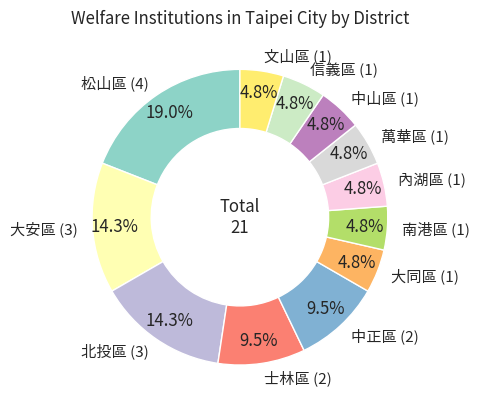

In [25]:
# Load the data from the CSV file containing information about welfare institutions
institutions_file_path = 'data/臺北市衛生福利部評鑑合格之醫院名單.csv'
institutions_data = pd.read_csv(institutions_file_path,encoding='big5')

# Extract the counts of institutions for each district
district_counts = institutions_data['區域別'].value_counts()

# Create labels with both district names and counts
labels = [f'{district} ({count})' for district, count in zip(district_counts.index, district_counts)]

# Set a custom Seaborn color palette
sns.set_palette("Set3")

# Create a donut chart with Seaborn style
fig, ax = plt.subplots()
ax.pie(district_counts, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.85)

# Draw a circle in the center to create a donut chart
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the total count in the center
total_count = len(institutions_data)
plt.text(0, 0, f'Total\n{total_count}', ha='center', va='center', fontsize=12, weight='bold')

# Rotate district labels by a custom angle (e.g., 45 degrees)
plt.xticks(rotation=45)

# Add labels and title
plt.title('Welfare Institutions in Taipei City by District')

# Show the plot
plt.show()